In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

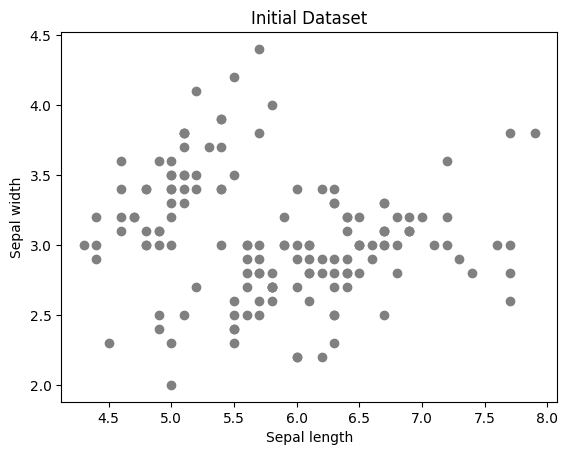

In [4]:
data = iris_dataset.data
data = iris_dataset.data[:,:2]

plt.scatter(data[:,0], data[:,1], c ="gray")
plt.title("Initial Dataset")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.show()

In [10]:
class KMeans:
    def __init__(self, k = 3, max_iters = 100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.cluster = None

    def initialize_centroids(self, data):
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum(np.power(x1-x2,2)))
    
    def assign_clusters(self, data):
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])

        return np.argmin(distances, axis = 1)
    
    def update_centroids(self, data):
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])
    
    def fit(self, data):
        self.initialize_centroids(data)

        for i in range(self.max_iters):
            # Gán các điểm dữ liệu vào các cụm
            self.clusters = self.assign_clusters(data)

            # Vẽ biểu đồ các cụm hiện tại
            self.plot_clusters(data, i)

            # Cập nhật centroids mới
            new_centroids = self.update_centroids(data)

            # Kiểm tra nếu các centroids không thay đổi, dừng thuật toán
            if np.all(self.centroids == new_centroids):
                break

            # Cập nhật centroids
            self.centroids = new_centroids

        # Vẽ biểu đồ cuối cùng của các cụm và centroids
        self.plot_final_clusters(data)

    def plot_clusters(self, data, iteration):
        """
        Vẽ biểu đồ các cụm dữ liệu tại một lần lặp nhất định.
        """
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title(f"Iteration {iteration + 1}")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()
    
    
    def plot_final_clusters(self, data):
        """
        Vẽ biểu đồ các cụm dữ liệu cuối cùng và centroids.
        """
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title("Final Clusters and Centroids")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()
    


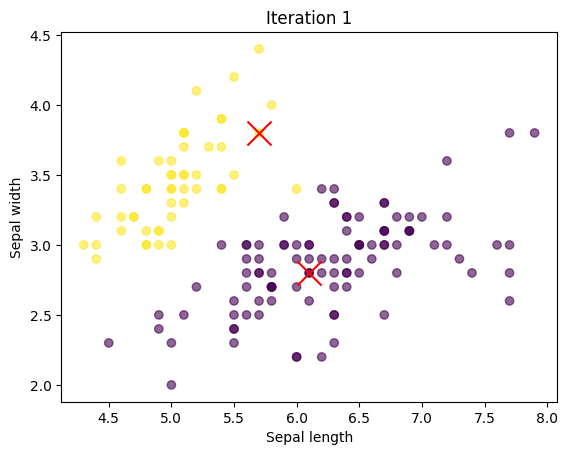

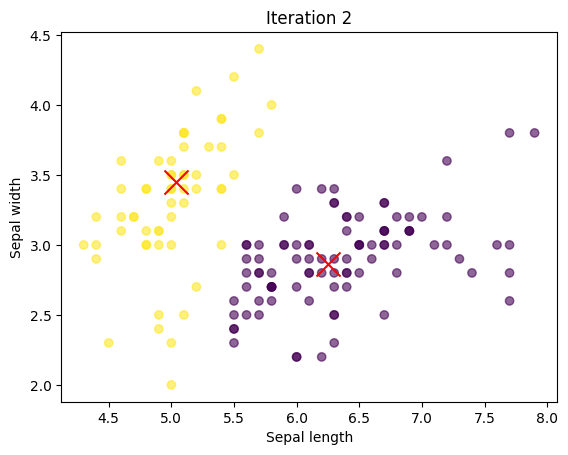

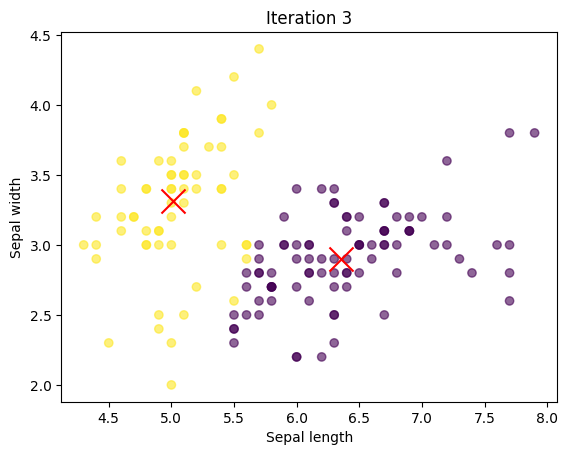

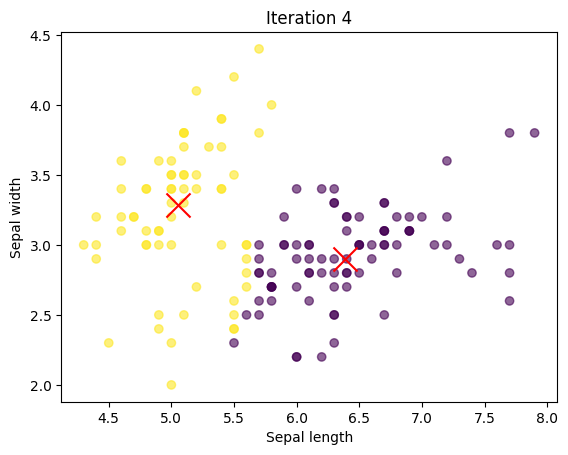

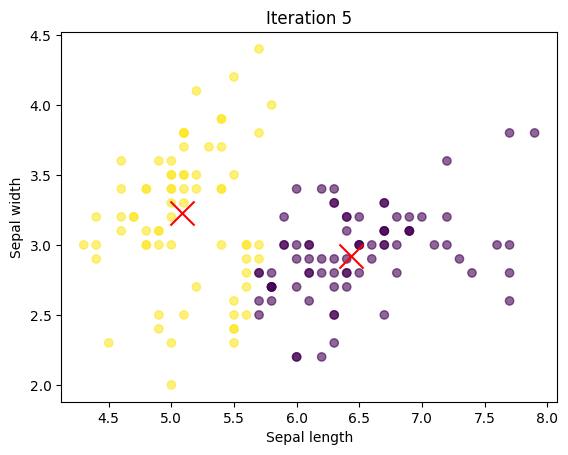

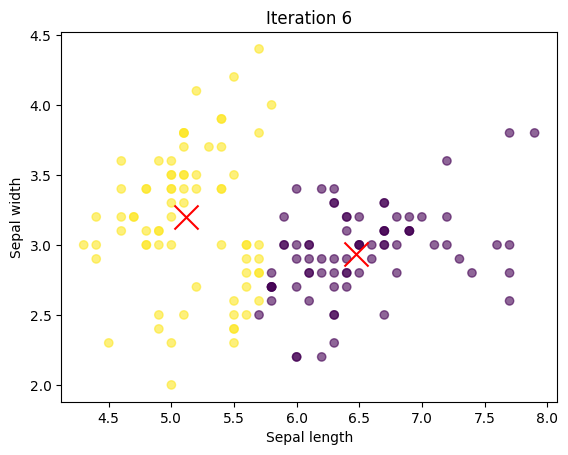

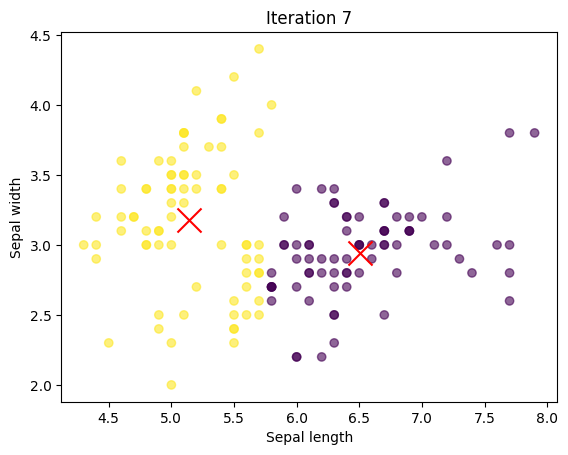

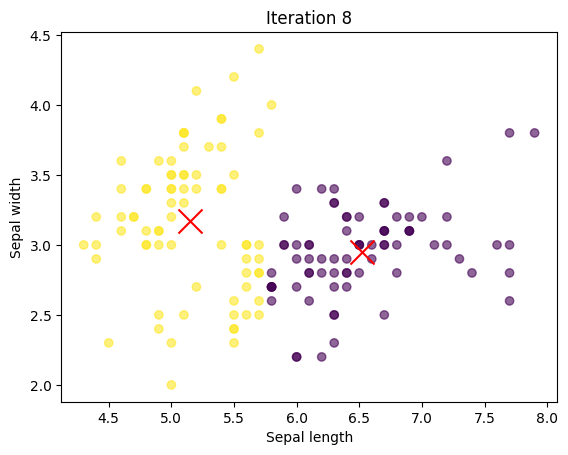

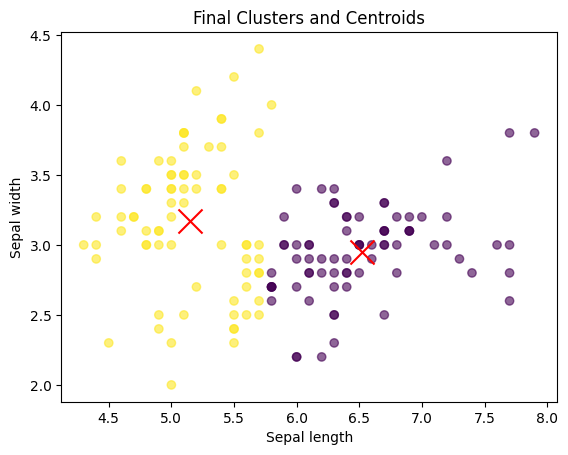

In [11]:
kmeans = KMeans(k=2)
kmeans.fit(data)

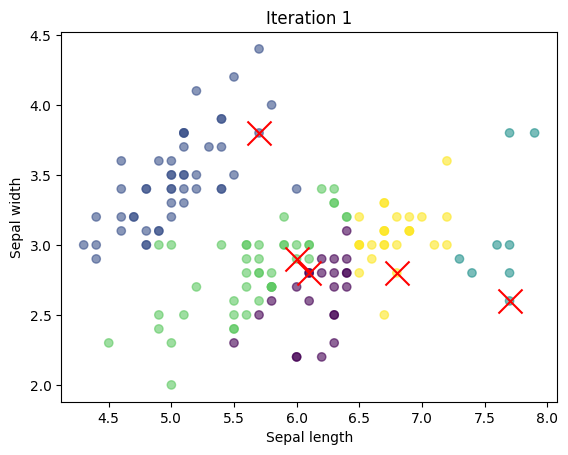

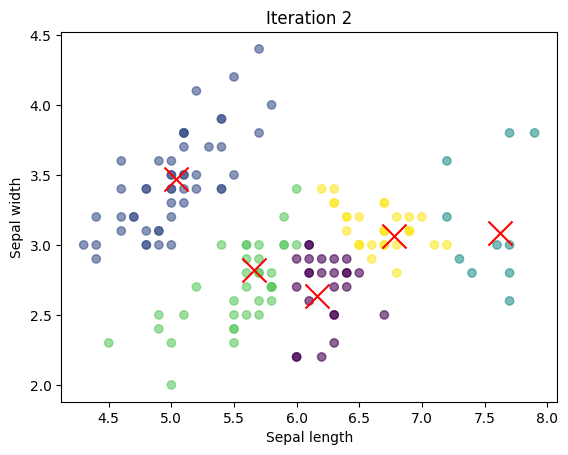

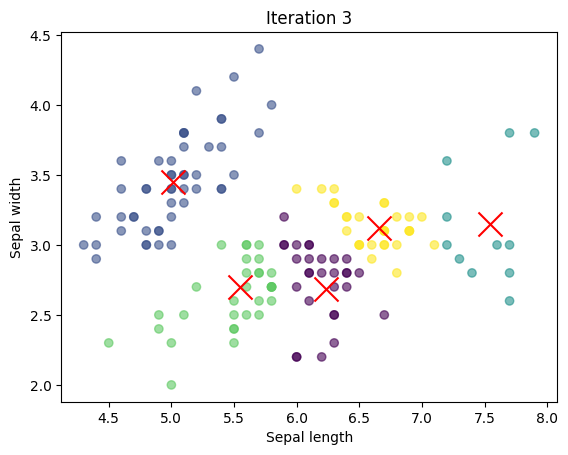

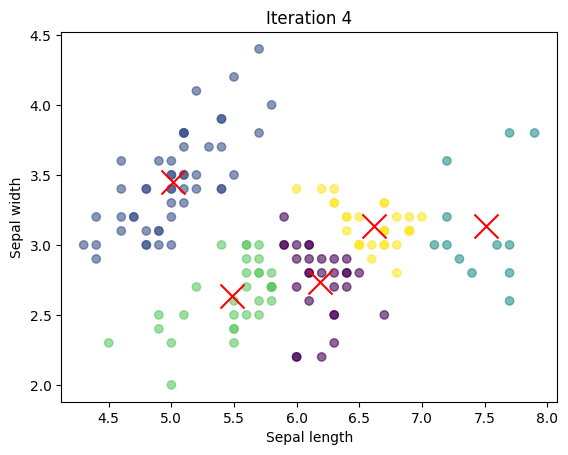

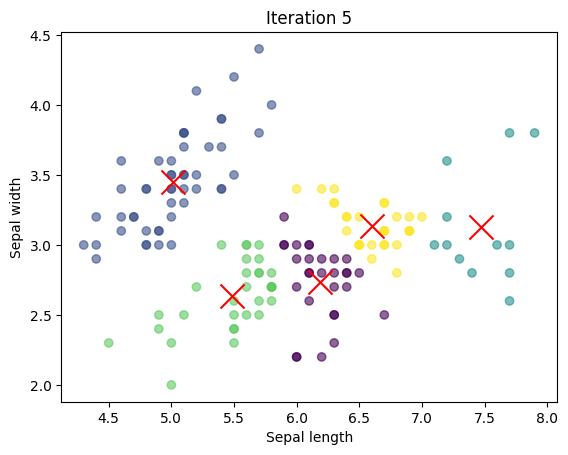

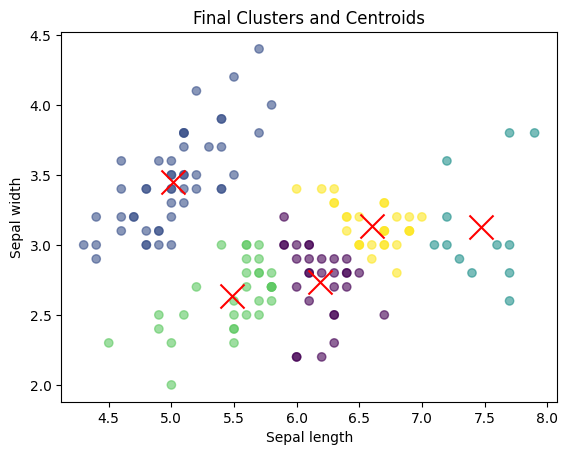

In [15]:
kmeans = KMeans(k=5)
kmeans.fit(data)